![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Face Mask Prediction using U-Net
Task is to predict the mask around the face in a given image.

# Instructions
- Some part of the code is already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

## Dataset
Faces in images marked with bounding boxes. Have around 409 images with around 1000 faces manually tagged via bounding box.
- Data file name: images.npy

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [1]:
from google.colab import drive
drive.mount('/content/MyDrive/')

Drive already mounted at /content/MyDrive/; to attempt to forcibly remount, call drive.mount("/content/MyDrive/", force_remount=True).


### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [2]:
import numpy as np
data = np.load('/content/MyDrive/My Drive/images.npy', allow_pickle=True)

### Check one sample from the loaded "images.npy" file  (2 marks)
- Hint: print data[10][1] 

In [3]:
data[10][1]

[{'imageHeight': 337,
  'imageWidth': 600,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.48, 'y': 0.10385756676557864},
   {'x': 0.7716666666666666, 'y': 0.6795252225519288}]}]

### Set image dimensions   (1 mark)
- Initialize image height, image width with value: 224 

In [4]:
IMAGE_HEIGHT=224
IMAGE_WIDTH=224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X" array
- Masks will be stored in "masks" array

In [5]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

In [6]:
masks[10].shape

(224, 224)

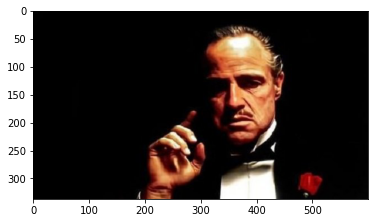

In [8]:
from matplotlib import pyplot as plt
plt.imshow(data[10][0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


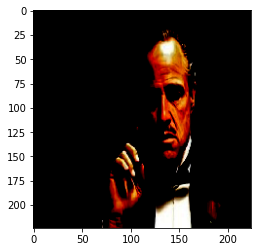

In [9]:
plt.imshow(X[10])

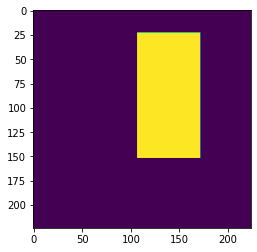

In [10]:
plt.imshow(masks[10])

### Split the data into training and testing (2 marks)
- 400 images in training
- 9 images in testing data

Training data

In [11]:
X_train = X[:400]
y_train = masks[:400]

Testing data

In [12]:
X_test = X[-9:]
y_test = masks[-9:]

In [13]:
print(f"The shape of the Train set-\nX_train {X_train.shape},\nY_train {y_train.shape}")

The shape of the Train set-
X_train (400, 224, 224, 3),
Y_train (400, 224, 224)


In [14]:
print(f"The shape of the Test set-\nX_test {X_test.shape},\nY_test {y_test.shape}")

The shape of the Test set-
X_test (9, 224, 224, 3),
Y_test (9, 224, 224)


### Print a sample training image, image array and its mask (2 marks)

Print the image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


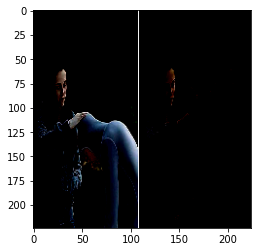

In [15]:
plt.imshow(X_train[0])

In [16]:
X_train[0]

array([[[-0.57647061, -0.6156863 , -0.63921571],
        [-0.41960782, -0.4588235 , -0.48235291],
        [-0.54509807, -0.57647061, -0.60784316],
        ...,
        [-0.79607844, -0.71764708, -0.70980394],
        [-0.84313726, -0.7647059 , -0.7647059 ],
        [-0.80392158, -0.72549021, -0.71764708]],

       [[-0.60784316, -0.64705884, -0.67058825],
        [-0.4588235 , -0.49803919, -0.52156866],
        [-0.49803919, -0.53725493, -0.56078434],
        ...,
        [-0.8509804 , -0.81960785, -0.83529413],
        [-0.8509804 , -0.81176472, -0.83529413],
        [-0.75686276, -0.72549021, -0.74117649]],

       [[-0.60784316, -0.64705884, -0.67058825],
        [-0.51372552, -0.5529412 , -0.57647061],
        [-0.52941179, -0.56862748, -0.59215689],
        ...,
        [-0.77254903, -0.78823531, -0.82745099],
        [-0.7647059 , -0.78039217, -0.81960785],
        [-0.73333335, -0.74901962, -0.78823531]],

       ...,

       [[-0.50588238, -0.57647061, -0.63137257],
        [-0

Print the mask

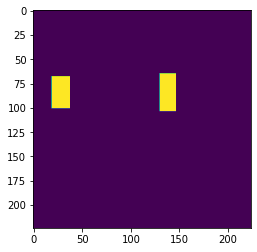

In [17]:
plt.imshow(y_train[0])

In [18]:
y_train[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Create the model (5 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [21]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D
from tensorflow.keras.models import Model

def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")

    for layer in model.layers:
        layer.trainable = trainable
  
    #### Add your code here ####
    blk_0 = model.get_layer('conv_pw_1_relu').output
    blk_1 = model.get_layer('conv_pw_3_relu').output
    blk_2 = model.get_layer('conv_pw_5_relu').output
    blk_3 = model.get_layer('conv_pw_11_relu').output
    blk_4 = model.get_layer('conv_pw_13_relu').output

    up1 = Concatenate()([UpSampling2D()(blk_4), blk_3])
    print(up1.shape)
    up2 = Concatenate()([UpSampling2D()(up1), blk_2])
    print(up2.shape)
    up3 = Concatenate()([UpSampling2D()(up2), blk_1])
    print(up3.shape)
    up4 = Concatenate()([UpSampling2D()(up3), blk_0])
    print(up4.shape)
    x = UpSampling2D()(up4)
    print(x.shape)
    x = Conv2D(1, kernel_size=1, activation='sigmoid')(x)
    print(x.shape)
    x = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH))(x)
    print(x.shape)
    return Model(model.input, outputs=x)

### Call the create_model function (1 mark)
- Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)

In [22]:
model = create_model(trainable=False)

(None, 14, 14, 1536)
(None, 28, 28, 1792)
(None, 56, 56, 1920)
(None, 112, 112, 1984)
(None, 224, 224, 1984)
(None, 224, 224, 1)
(None, 224, 224)


### Print model summary (1 mark)

In [23]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
_______________________________________________________________________________________

### Define dice coefficient function (2 marks)
- Create a function to calculate dice coefficient


In [24]:
from tensorflow import reduce_sum

def dice_coefficient(y_true, y_pred):
    intersection = reduce_sum(y_true * y_pred)
    denominator = reduce_sum(y_true + y_pred)
    return (2 * intersection) / (denominator + 0.000001)

### Define loss function (2 marks)

In [25]:
def dice_loss_func(y_true, y_pred):
    return (1 - dice_coefficient(y_true, y_pred))

### Compile the model (2 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [26]:
model.compile(loss=dice_loss_func, optimizer='adam', metrics=dice_coefficient)

### Define callbacks (2 marks)
- Use ModelCheckpoint
- Use EarlyStopping
- Use ReduceLROnPlateau

In [27]:
from tensorflow import keras
early_stopping = keras.callbacks.EarlyStopping(mode='min', monitor='loss', verbose=1)

In [28]:
checkpoint_filepath = 'checkpoint.h5'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='loss',
    mode='min',
    save_best_only=True)

In [29]:
reduce_lr = keras.callbacks.ReduceLROnPlateau(mode='min', monitor='loss', factor=0.2, patience=2, min_lr=0.001)

### Fit the model (2 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: use the callbacks defined above

In [31]:
epochs = 10
model.fit(X_train, y_train, epochs=epochs, batch_size=1, callbacks=[model_checkpoint_callback, reduce_lr, early_stopping])

Epoch 1/10
400/400 [==============================] - 10s 24ms/step - loss: 0.3312 - dice_coefficient: 0.6688
Epoch 2/10
400/400 [==============================] - 10s 24ms/step - loss: 0.3275 - dice_coefficient: 0.6725
Epoch 3/10
400/400 [==============================] - 10s 24ms/step - loss: 0.3255 - dice_coefficient: 0.6745
Epoch 4/10
400/400 [==============================] - 10s 24ms/step - loss: 0.3225 - dice_coefficient: 0.6775
Epoch 5/10
400/400 [==============================] - 9s 24ms/step - loss: 0.3235 - dice_coefficient: 0.6765
Epoch 00005: early stopping


### Get the predicted mask for a test image   (2 marks)

Show the test image

In [63]:
ti = 0

In [64]:
X_test[ti]

array([[[ 0.64705884,  0.77254903,  0.89803922],
        [ 0.64705884,  0.77254903,  0.89803922],
        [ 0.65490198,  0.78039217,  0.90588236],
        ...,
        [ 0.72549021,  0.79607844,  0.9137255 ],
        [ 0.71764708,  0.78823531,  0.90588236],
        [ 0.71764708,  0.78823531,  0.90588236]],

       [[ 0.64705884,  0.77254903,  0.89803922],
        [ 0.64705884,  0.77254903,  0.89803922],
        [ 0.64705884,  0.77254903,  0.89803922],
        ...,
        [ 0.71764708,  0.78823531,  0.90588236],
        [ 0.71764708,  0.78823531,  0.90588236],
        [ 0.71764708,  0.78823531,  0.90588236]],

       [[ 0.64705884,  0.77254903,  0.89803922],
        [ 0.64705884,  0.77254903,  0.89803922],
        [ 0.64705884,  0.77254903,  0.89803922],
        ...,
        [ 0.71764708,  0.78823531,  0.90588236],
        [ 0.71764708,  0.78823531,  0.90588236],
        [ 0.71764708,  0.78823531,  0.90588236]],

       ...,

       [[-0.41960782, -0.34901959, -0.78823531],
        [-0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


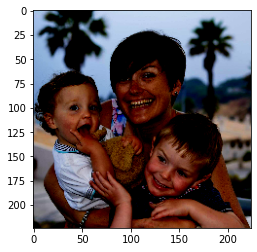

In [65]:
plt.imshow(X_test[ti])

Show original mask for test image

In [66]:
y_test[ti]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

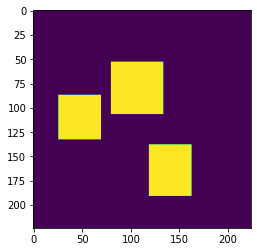

In [67]:
plt.imshow(y_test[ti])

Predict the mask on the test image

In [68]:
pred_mask = model.predict(x = np.array([X_test[ti]]))[0] > 0.5

### Impose the mask on the test image (2 marks)
- In imshow use the alpha parameter and set it to greater than 0.5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


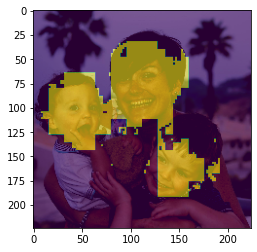

In [70]:
plt.imshow(X_test[ti])
plt.imshow(pred_mask, alpha=0.6)